In [1]:
%run /g/data/e14/cp3790/Charuni/ModelExperiment/model-run-function-definitions.ipynb

from scipy import signal
import xesmf as xe
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
%matplotlib inline

## Mean sea level pressure

In [3]:
TEMP_VAR = "air_pressure_at_sea_level"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pverb_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pverb_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pverb_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

mslp_con_months_xr = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [4]:
con_mslp_mon = get_year_months_xr(con_year_xr_map, con_year_xr_map)
alt_mslp_mon = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

In [5]:
con_mslp_mon_clim = con_mslp_mon.groupby('time.month').mean(dim='time')
alt_mslp_mon_clim = alt_mslp_mon.groupby('time.month').mean(dim='time')

In [6]:
diff_mslp_mon_clim = alt_mslp_mon_clim - con_mslp_mon_clim

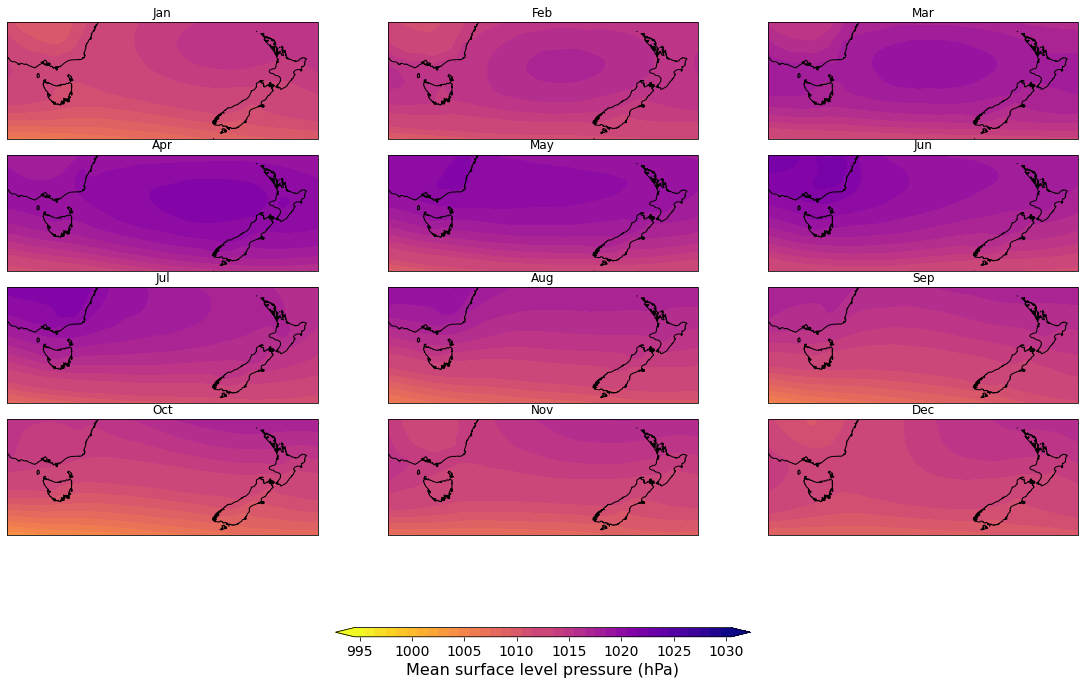

In [84]:
## Mean monthly MSLP climatology of ensemble runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = alt_mslp_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(994.5, 1031, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('plasma_r', 35),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(995,1035,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Mean surface level pressure (hPa)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_alt_mslp.png')
    plt.show()
    

multiple_plots()

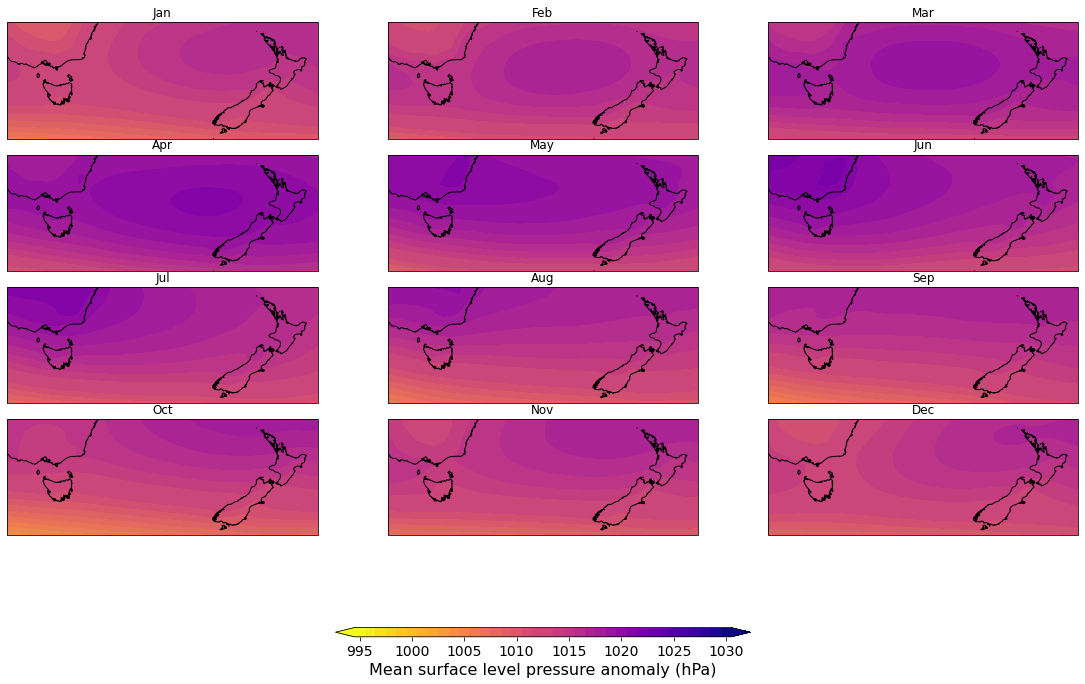

In [82]:
## Mean monthly MSLP climatology of control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = con_mslp_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(994.5, 1031, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('plasma_r', 35),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(995,1035,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Mean surface level pressure anomaly (hPa)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_con_mslp.png')
    plt.show()
    

multiple_plots()

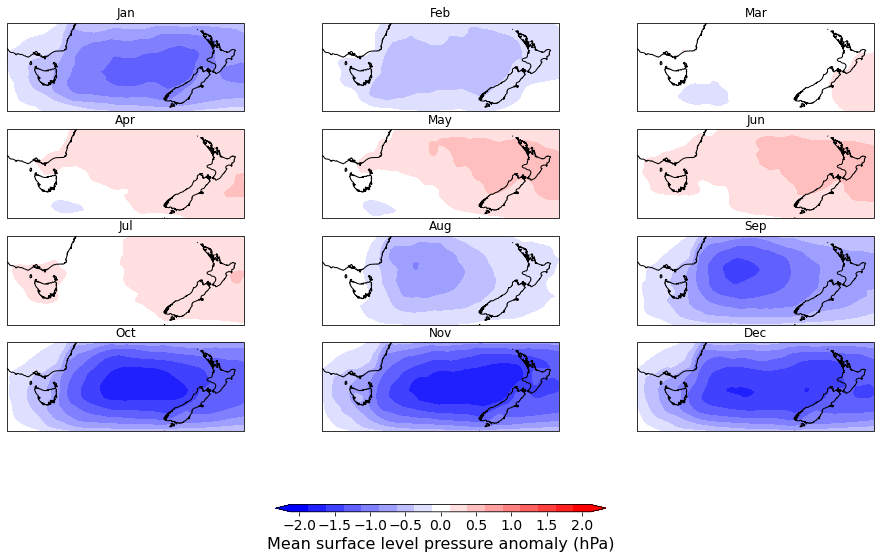

In [14]:
## Difference in Mean monthly MSLP climatology of ensemble and control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = diff_mslp_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-2.125, 2.25, 0.25),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    #fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-2,2.5,0.5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Mean surface level pressure anomaly (hPa)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_diff_mslp.png')
    plt.show()
    

multiple_plots()

## Surface winds

In [15]:
TEMP_VAR = "uas"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

uas_con_months_xr = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

uas_year_months_xr = get_year_and_months_xr(alt_year_xr_map, alt_year_xr_map)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [16]:
con_uas_mon = get_year_months_xr(con_year_xr_map, con_year_xr_map)
alt_uas_mon = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

In [17]:
con_uas_mon_clim = con_uas_mon.groupby('time.month').mean(dim='time')
alt_uas_mon_clim = alt_uas_mon.groupby('time.month').mean(dim='time')

In [18]:
diff_uas_mon_clim = alt_uas_mon_clim - con_uas_mon_clim

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


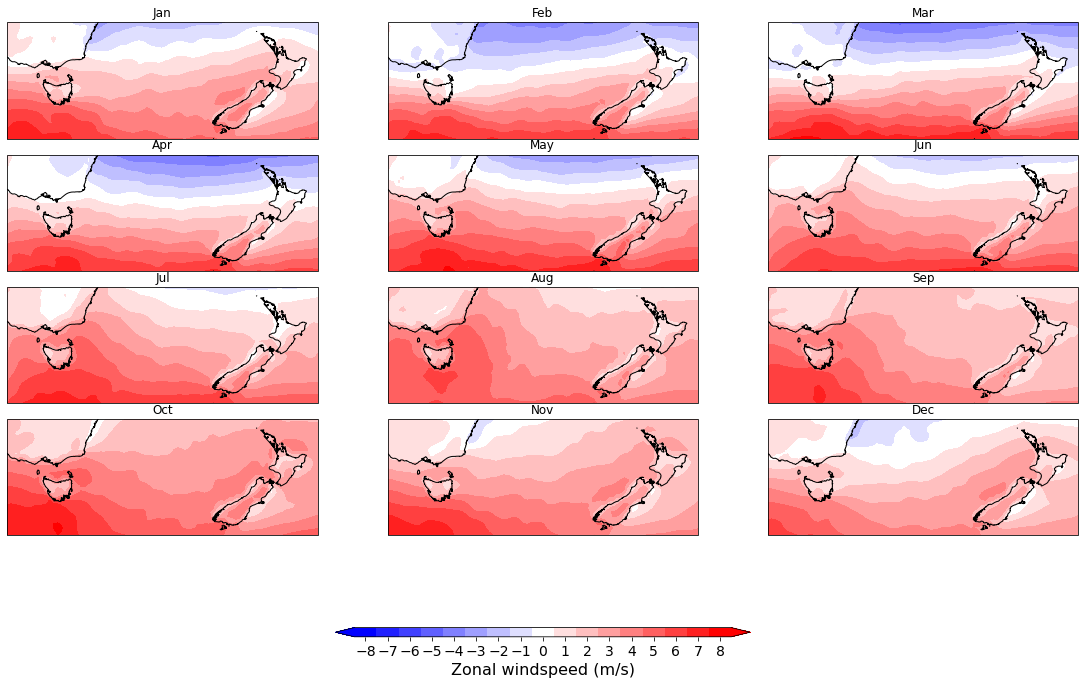

In [25]:
## Mean monthly uas climatology of ensemble runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = alt_uas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-8.5, 9, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8,9,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Zonal windspeed (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_alt_uas.png')
    plt.show()
    

multiple_plots()

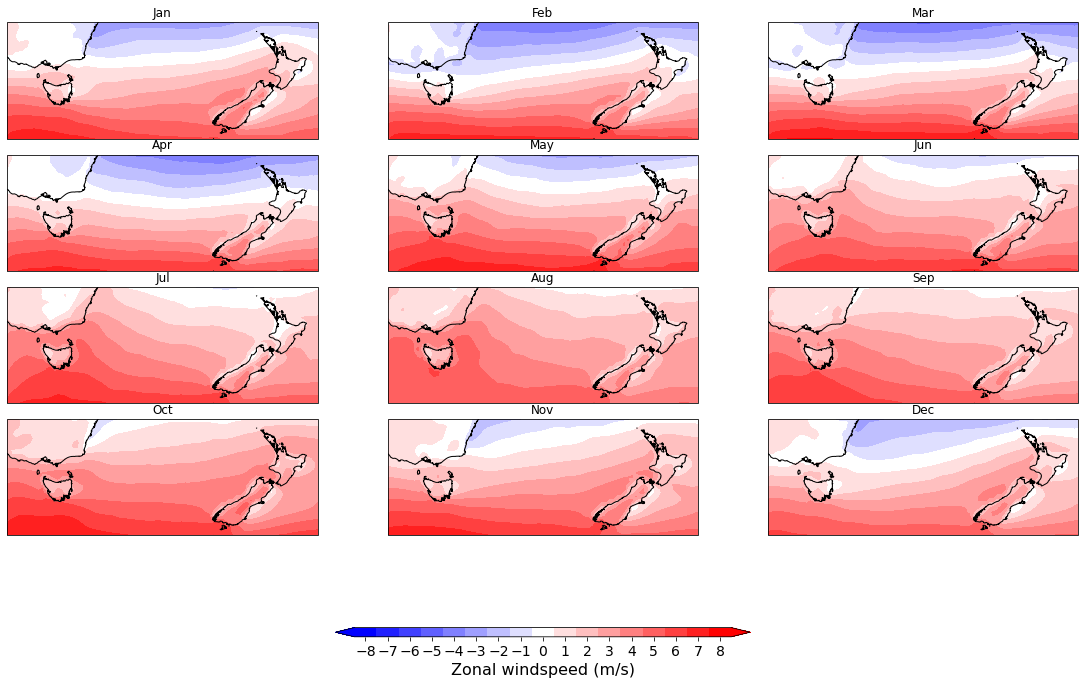

In [26]:
## Mean monthly uas climatology of control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = con_uas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-8.5, 9, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-8,9,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Zonal windspeed (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_con_uas.png')
    plt.show()
    

multiple_plots()

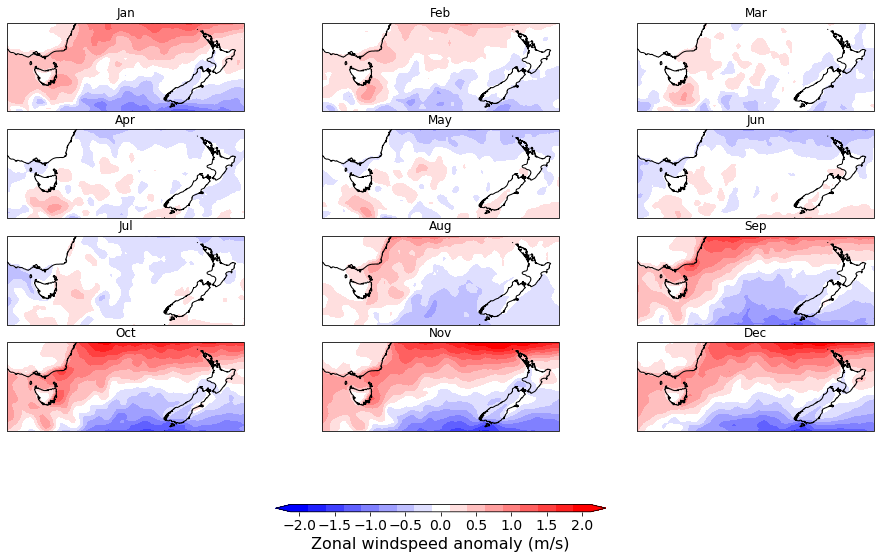

In [29]:
## Difference in Mean monthly uas climatology of control runs and ensemble runs

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = diff_uas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-2.125, 2.25, 0.25),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    #fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-2,2.5,0.5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Zonal windspeed anomaly (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_diff_uas.png')
    plt.show()
    

multiple_plots()

In [30]:
TEMP_VAR = "vas"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

vas_con_months_xr = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

vas_year_months_xr = get_year_and_months_xr(alt_year_xr_map, alt_year_xr_map)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [31]:
con_vas_mon = get_year_months_xr(con_year_xr_map, con_year_xr_map)
alt_vas_mon = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

In [32]:
con_vas_mon_clim = con_vas_mon.groupby('time.month').mean(dim='time')
alt_vas_mon_clim = alt_vas_mon.groupby('time.month').mean(dim='time')

In [33]:
diff_vas_mon_clim = alt_vas_mon_clim - con_vas_mon_clim

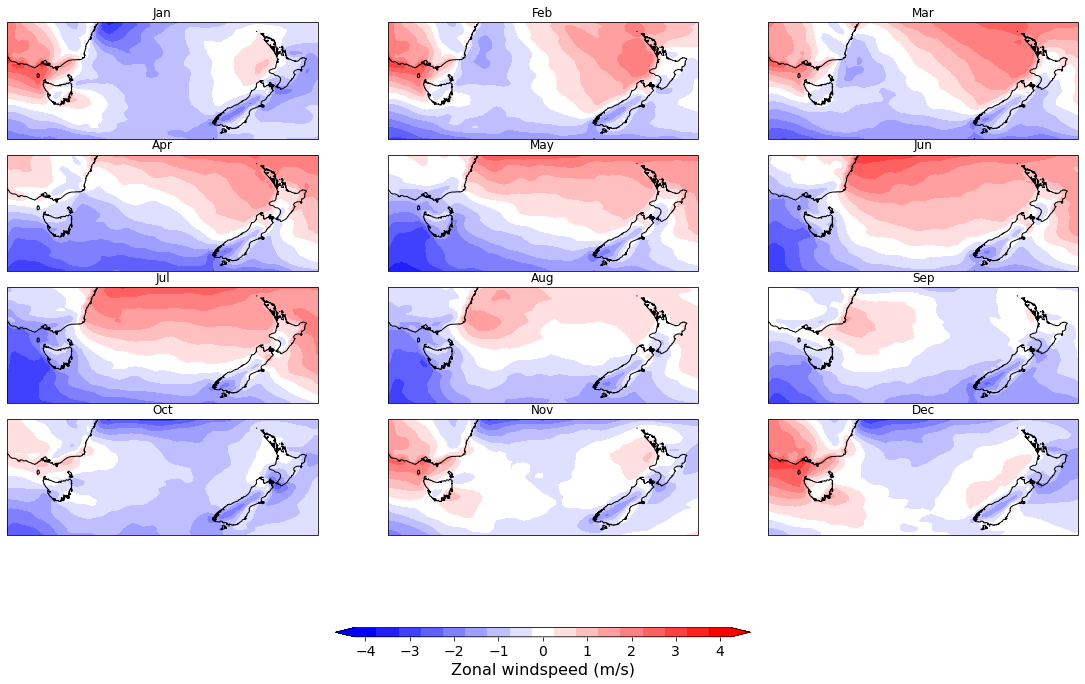

In [44]:
## Mean monthly vas climatology of ensemble runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = alt_vas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-4.25, 4.5, 0.5),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-4,5,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Zonal windspeed (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_alt_vas.png')
    plt.show()
    

multiple_plots()

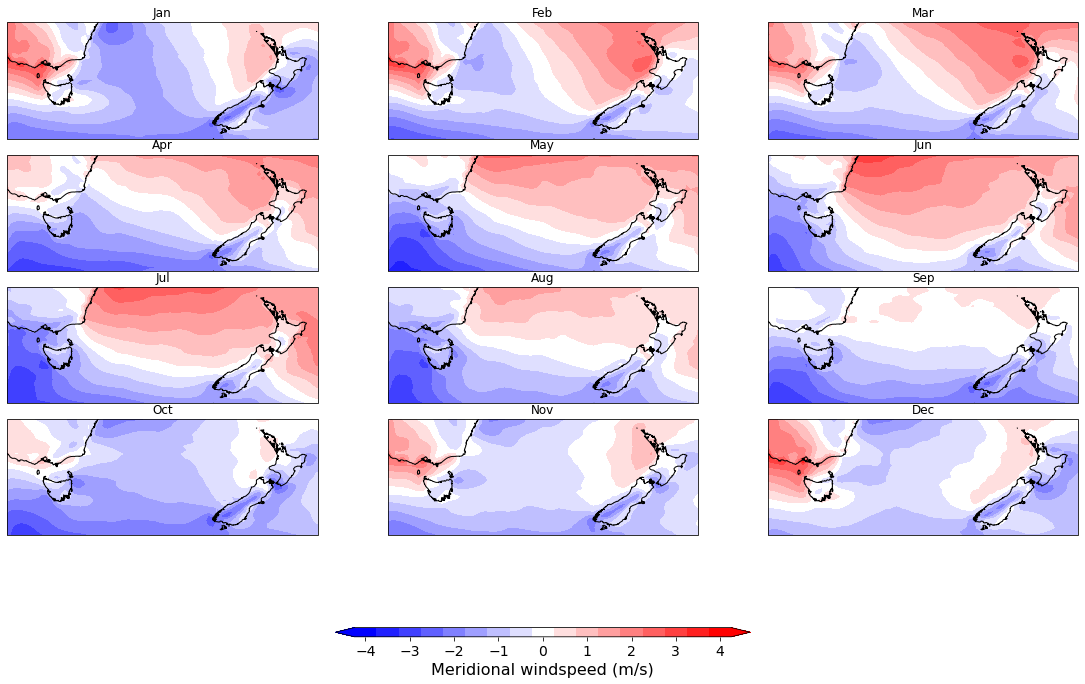

In [39]:
## Mean monthly vas climatology of control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = con_vas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-4.25, 4.5, 0.5),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-4,5,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Meridional windspeed (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_con_vas.png')
    plt.show()
    

multiple_plots()

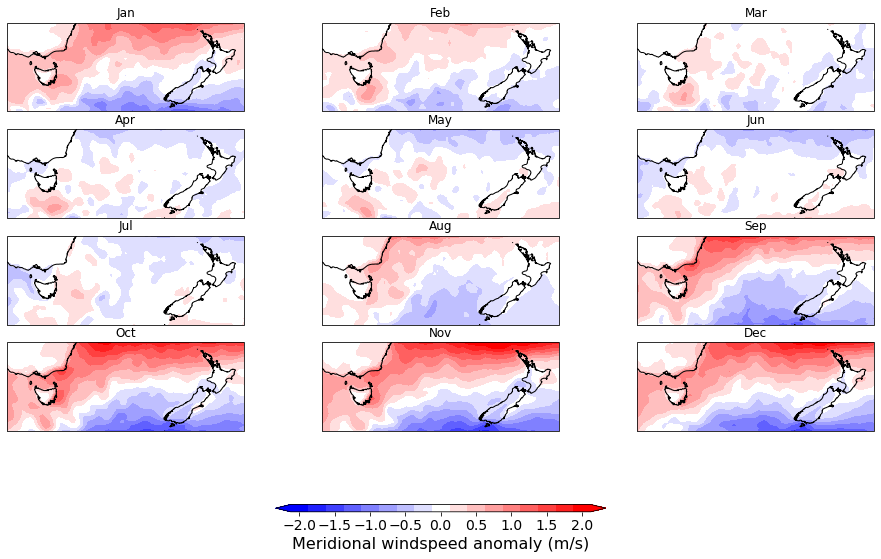

In [43]:
## Difference in Mean monthly uas climatology of control runs and ensemble runs

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = diff_uas_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude_0,
                cur_data.latitude_0,
                cur_data.values,
                levels=np.arange(-2.125, 2.25, 0.25),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([140, 180, -48, -33],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    #fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-2,2.5,0.5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Meridional windspeed anomaly (m/s)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_diff_vas.png')
    plt.show()
    

multiple_plots()

## ERA5 Winds and MSLP

In [2]:
ds_u = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-WIND/u10/era5_dailyu10_*.nc',
                         chunks = {'longitude':120, 'latitude':80, 'time':90})
ds_v = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-WIND/v10/era5_dailyv10_*.nc',
                        chunks = {'longitude':120, 'latitude':80, 'time':90})

In [4]:
ds_w = xr.open_dataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-WIND/windspeed_1982_2018.nc',
                      chunks = {'longitude':120, 'latitude':80, 'time':90})

In [5]:
windspeed = ds_w.windspeed.sel(latitude=slice(-30, -53), longitude=slice(135, 180))

In [6]:
windspeed_mon = windspeed.groupby('time.month').mean('time')

In [73]:
uwind = ds_u.u10.sel(latitude=slice(-30, -53), longitude=slice(135, 180))
vwind = ds_v.v10.sel(latitude=slice(-30, -53), longitude=slice(135, 180))

In [74]:
uwind_seas = uwind.groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],
                                                                           dims=['season']))
vwind_seas = vwind.groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],
                                                                           dims=['season']))

In [98]:
uwind_mon = uwind.groupby('time.month').mean('time')
vwind_mon = vwind.groupby('time.month').mean('time')

In [77]:
ds_msl = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-MSL/era5_dailymsl_*.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90})
                     
msl = (ds_msl['dailymsl']/100).sel(latitude=slice(-30, -53), longitude=slice(135, 180))
msl_seas = msl.groupby('time.season').mean('time').sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],
                                                                       dims=['season']))

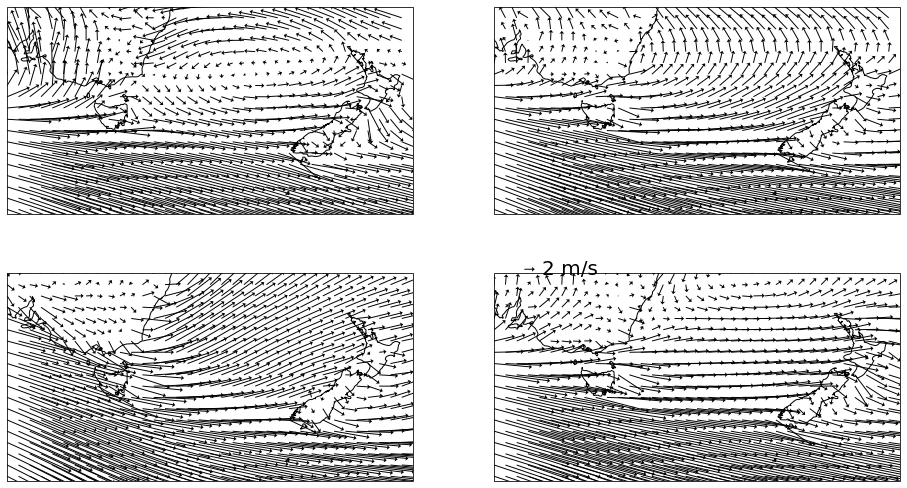

In [97]:
#  Plot seasonal panels winds (ERA5)

x = vwind_seas['longitude']
y = uwind_seas['latitude']

def multiple_plots():
    nrow = 2
    ncol = 2
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data2 = uwind_seas
    data3 = vwind_seas
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            q = ax[row, col].quiver(
                x[::5], y[::5],
                data2[data_idx][::5, ::5],
                data3[data_idx][::5, ::5],
                scale=20,
                units='height', headwidth=5, headlength=3, headaxislength=2.5
        )


            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            #ax[row, col].set_title(uwind_seas['season'].values.item())

            data_idx += 1
            if data_idx >3:
                stop_plotting = True
                break
        if stop_plotting:
            break

        #fig.tight_layout()

        # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
        ax_flat = ax.flatten(order='C')
    plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':20})
        #plt.suptitle('Control run',fontsize=20)
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/era5_seas_winds_1982_2018.png')   

multiple_plots()

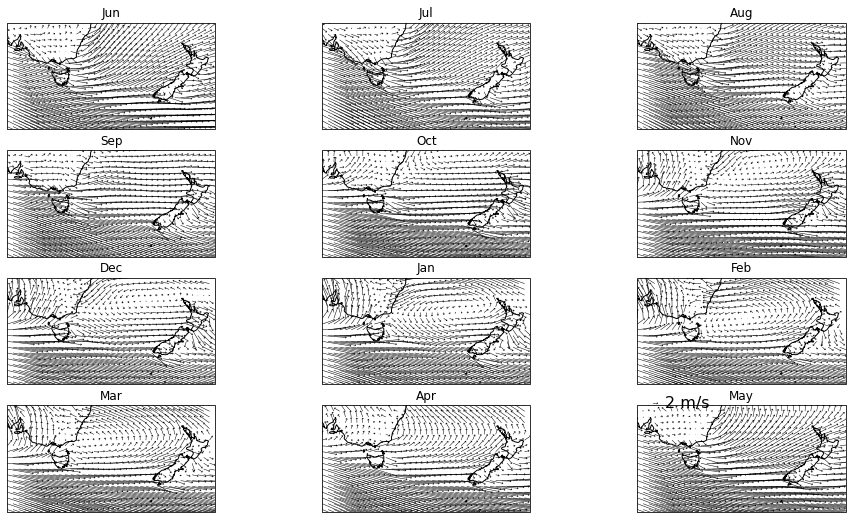

In [135]:
#  Plot monthly panels winds (ERA5)

x = vwind_mon['longitude']
y = uwind_mon['latitude']

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data2 = uwind_mon
    data3 = vwind_mon
    
        
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            q = ax[row, col].quiver(
                x[::5], y[::5],
                data2[data_idx][::5, ::5],
                data3[data_idx][::5, ::5],
                scale=20,
                units='height', headwidth=5, headlength=3, headaxislength=2.5
        )


            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx])

            month_num_idx += 1

        # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    plt.quiverkey(q, 0.1, 1.02, 1, '2 m/s', labelpos='E', fontproperties={'size':16})
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/era5_monthly_winds_1982_2018_june.png')   

multiple_plots()

In [3]:
ds = xr.open_dataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-LAND-T2M/lsm_1279l4_0.1x0.1.grb_v4_unpack.nc')
mask = ds.lsm.sel(latitude=slice(-30, -53), longitude=slice(135, 180)).mean(dim='time')

In [8]:
mean_windspeed = windspeed.mean(dim='time')

In [17]:
diff_1 = (windspeed_mon.where(mask==0).isel(month=0) - mean_windspeed)

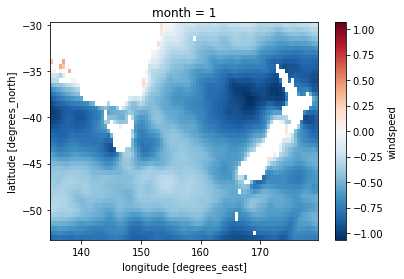

In [19]:
diff_1.plot()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


KeyboardInterrupt: 

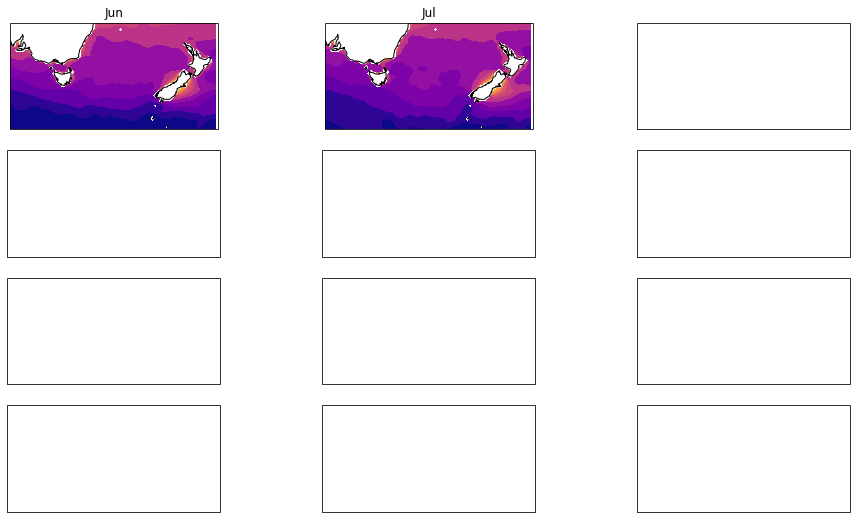

In [9]:
## Mean monthly windspeed ERA5

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = windspeed_mon.where(mask==0)
    
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(3.75, 10.5, 0.5),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('plasma_r', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx])
            
            month_num_idx += 1   

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(4,11,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Windspeed (m/s)', fontsize=16)
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_era5_windspeed_june.png')
    

multiple_plots()

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **

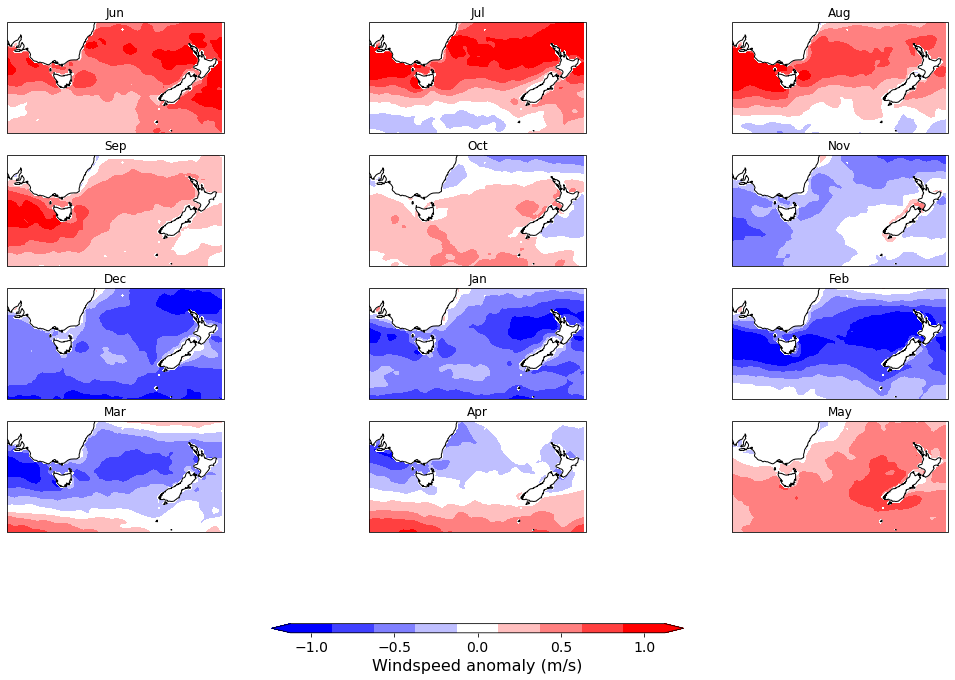

In [10]:
## Mean monthly windspeed ERA5 -  mean windspeed

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = windspeed_mon.where(mask==0)
    data2 = mean_windspeed
    
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = (data.isel(month=data_idx) - data2)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-1.125, 1.25, 0.25),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx])
            
            month_num_idx += 1   

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-1,1.5,0.5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label='Windspeed anomaly (m/s)', fontsize=16)
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_era5_windspeed_june_new.png')
    

multiple_plots()

## Surface air temperature

In [21]:
TEMP_VAR = "ts_0"

#Alt 
alt_year_xr_map = get_alt_year_xr_map(
    TEMP_VAR,
    "/g/data/e14/cp3790/Charuni/ModelRun/alt-runs/um_pvera_{}.nc")  

# Con

# bundle info
bundle_1980 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1980/um_pvera_*.nc')
bundle_1999 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/ModelRun/control-new/result-uby108-1999/um_pvera_*.nc')
con_bundles = {
    '1980': {
        'xr': bundle_1980,
        'start': 1981,
        'end': 1998,
    },
    '1999': {
        'xr': bundle_1999,
        'start': 2000,
        'end': 2018,
    }
}

con_year_xr_map = get_con_year_xr_map(alt_year_xr_map, con_bundles, TEMP_VAR)

alt_temp_year_months_xr = get_year_and_months_xr(alt_year_xr_map, alt_year_xr_map)

con_temp_year_months_xr = get_year_and_months_xr(con_year_xr_map, con_year_xr_map)

# Diff
diff_year_xr_map = get_diff_year_xr_map(alt_year_xr_map, con_year_xr_map)

In [22]:
con_temp_mon = get_year_months_xr(con_year_xr_map, con_year_xr_map)
alt_temp_mon = get_year_months_xr(alt_year_xr_map, alt_year_xr_map)

In [ ]:
sortby(xr.DataArray(['DJF','MAM','JJA', 'SON'],dims=['season']))

In [122]:
con_temp_mon_clim = con_temp_mon.groupby('time.month').mean(dim='time').sortby(
    xr.DataArray(['9','10','11','12','1','2','3','4','5','6','7','8'],dims=['month']))
#alt_temp_mon_clim = alt_temp_mon.groupby('time.month').mean(dim='time')

In [12]:
diff_temp_mon_clim = alt_temp_mon_clim - con_temp_mon_clim

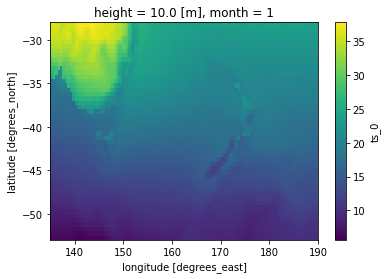

In [26]:
con_temp_mon_clim.isel(month=0).plot()

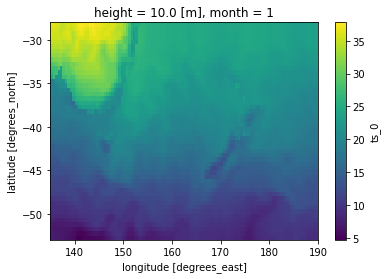

In [27]:
alt_temp_mon_clim.isel(month=0).plot()

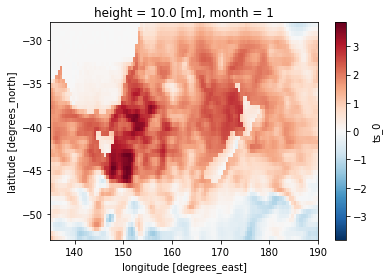

In [28]:
(alt_temp_mon_clim.isel(month=0) - con_temp_mon_clim.isel(month=0)).plot()

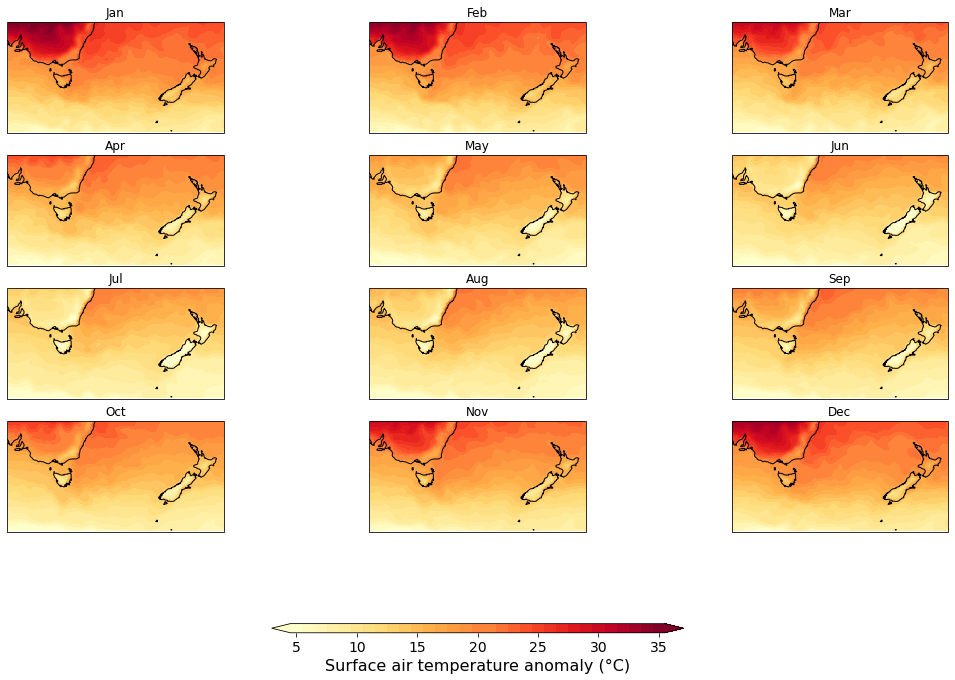

In [77]:
## Mean monthly climatology of ensemble runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = alt_temp_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(4.5, 36.0, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('YlOrRd', 30),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
    

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           

    ax_flat = ax.flatten(order='C')    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(5,40,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label=u'Surface air temperature anomaly (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
       
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_alt_temp.png')
    plt.show()
    

multiple_plots()

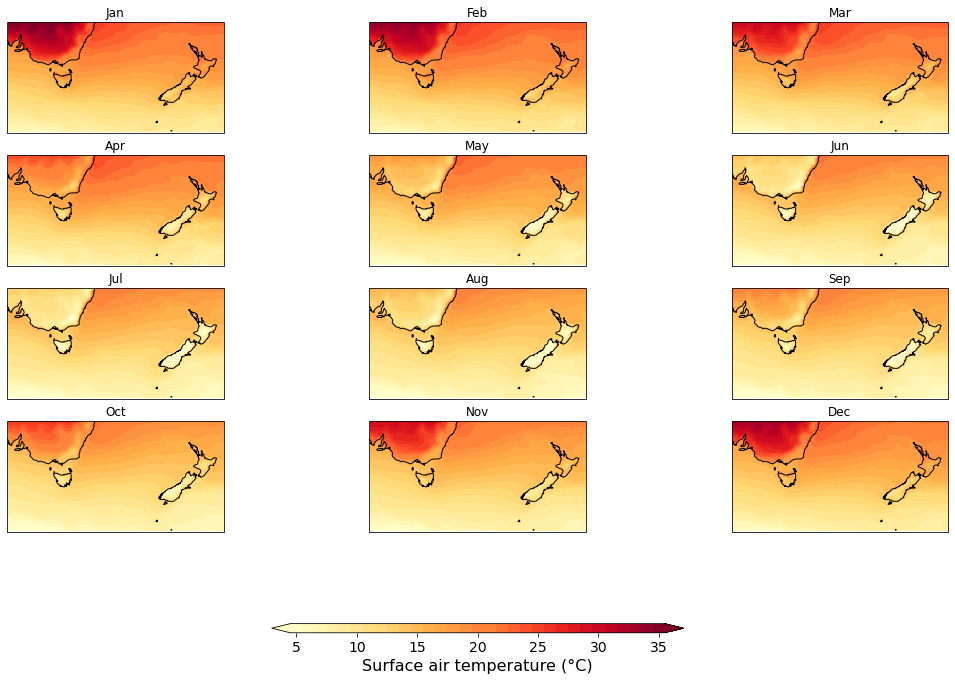

In [83]:
## Mean monthly climatology of control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = con_temp_mon_clim
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(4.5, 36.0, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('YlOrRd', 30),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()              
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(5,40,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label=u'Surface air temperature (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_con_temp.png')
    

multiple_plots()

In [129]:
num = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
for data_idx in num:
    print (data_idx)

5
6
7
8
9
10
11
0
1
2
3
4


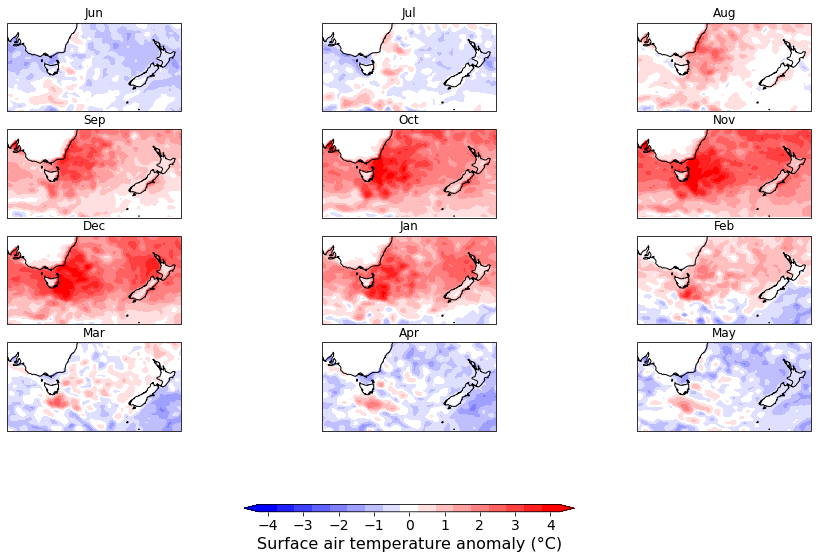

In [133]:
## Difference in Mean monthly climatology of ensemble and control runs 

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = diff_temp_mon_clim
    
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(-4.25, 4.5, 0.5),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('bwr', 17),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(month_labels[data_idx])

            month_num_idx += 1
                

    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')

    #fig.tight_layout()              
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(-4,5,1),
                        fraction=0.015,aspect=45)
    cbar.set_label(label=u'Surface air temperature anomaly (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)

    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_diff_temp_june.png')
    plt.show()

multiple_plots()

## NOAA OISST

In [2]:
oisst = xr.open_dataset('/g/data/e14/cp3790/Charuni/NOAA-OISST/oisst_aus_coast_time_merged.nc',
                       chunks = {'longitude':120, 'latitude':80, 'time':90})

In [3]:
sst = oisst.sst.sel(lat=slice(-53, -30), lon=slice(135, 180))

In [4]:
sst_mon = sst.resample(time='1M').mean(dim='time')

In [5]:
sst_mon = sst.groupby('time.month').mean('time')

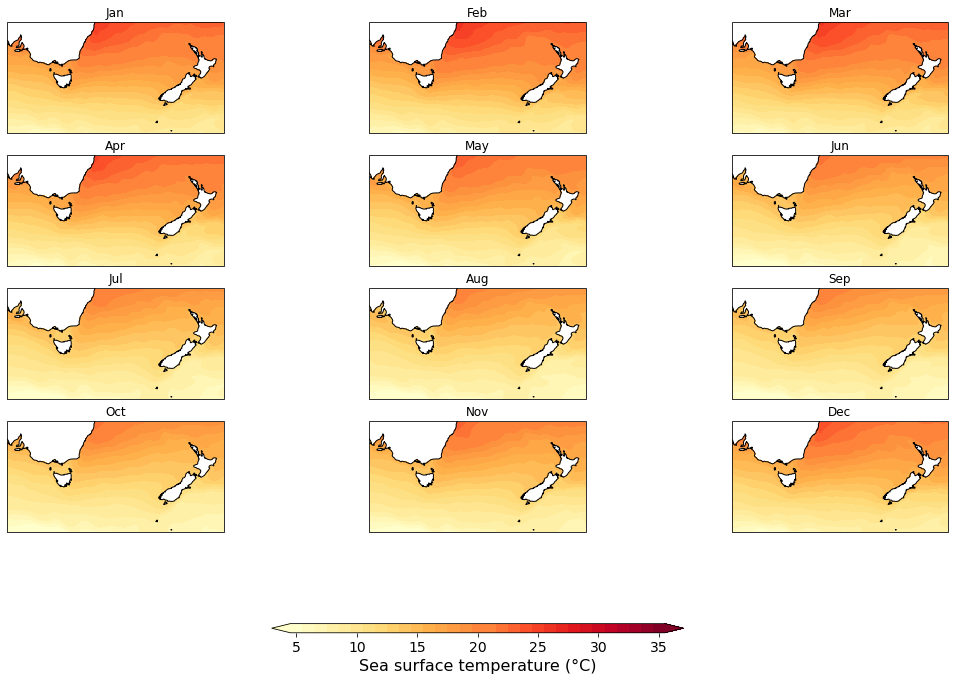

In [62]:
## Mean monthly climatology of NOAA SST

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = sst_mon
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.lon,
                cur_data.lat,
                cur_data.values,
                levels=np.arange(4.5, 36, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('YlOrRd', 30),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(5,40,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label=u'Sea surface temperature (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_noaasst_temp2.png')
    

multiple_plots()

## ERA5 TEMP

In [6]:
ds_era5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/era5_dailytmean_*.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90})

In [7]:
tmean = (ds_era5['dailytmean']-273.15).sel(latitude=slice(-30, -53), longitude=slice(135, 180))

In [8]:
tmean_mon = tmean.groupby('time.month').mean('time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1714: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


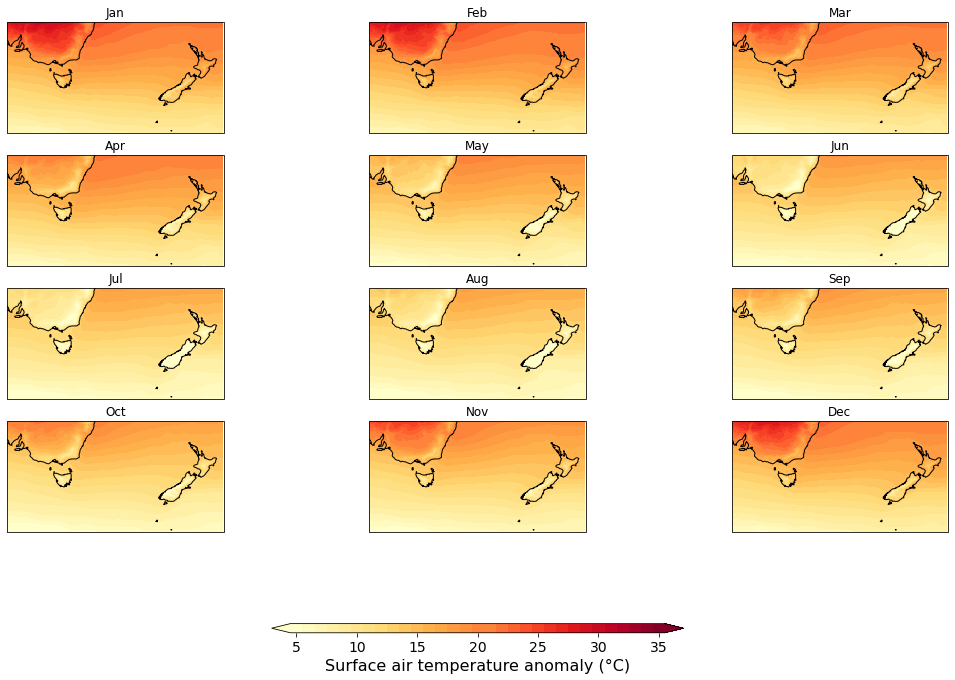

In [49]:
## Mean monthly climatology of ERA5 SAT

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = tmean_mon
    
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    data_idx = 0
    stop_plotting = False
    for row in range(nrow):
        for col in range(ncol):
            cur_data = data.isel(month=data_idx)
            contour = ax[row, col].contourf(
                cur_data.longitude,
                cur_data.latitude,
                cur_data.values,
                levels=np.arange(4.5, 36.0, 1),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('YlOrRd', 30),
                extend='both'
            )
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_title(months[data_idx])
            
            data_idx += 1
            if data_idx > 11:
                stop_plotting = True
                break
        if stop_plotting:
            break
            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()         
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(5,40,5),
                        fraction=0.015,aspect=45)
    cbar.set_label(label=u'Surface air temperature anomaly (\u00B0C)', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/mon_clim_era5_temp.png')
    

multiple_plots()

## Correlation between coastal SAT and SST 

xr.shift to shift longitude by 1, and then do a correlation 


In [2]:
ds_era5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/t2m_anom_noaa_remap.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
sata = ds_era5.t2m_anomaly.sel(lat=slice(-53, -30), lon=slice(135, 180))

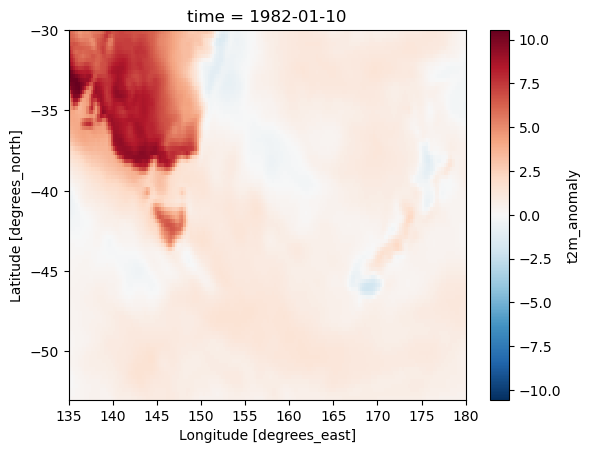

In [5]:
sata.isel(time=9).plot()

In [76]:
ds_gm = xr.open_mfdataset(['/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-70to-50.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-70to-50.1981.2022.nc'],
                         chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
ssta = ds_gm.ssta.sel(lat=slice(-53, -30), lon=slice(135, 180))

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 01-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


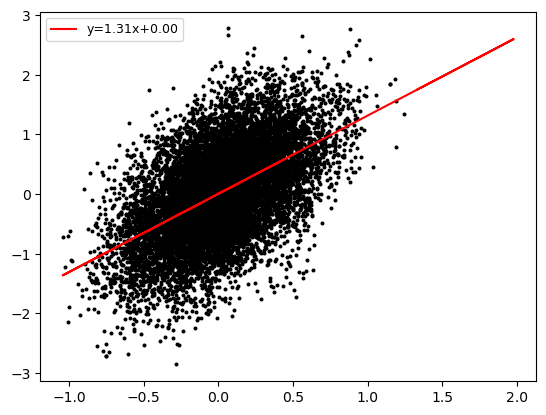

In [72]:
line = slope*ocean_temperature+intercept
plt.plot(ocean_temperature, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
#end

plt.scatter(ocean_temperature,land_temperature, color="k", s=3.5)
plt.legend(fontsize=9)

plt.show()

In [61]:
sata_shifted = sata.shift(lon=2)

In [43]:
sata_shifted_nz = sata.shift(lon=-1)

In [55]:
ssta_shifted = ssta.shift(lon=-1)

In [62]:
sata_shifted_ssta_corr = xr.corr(sata_shifted, ssta, dim='time')

In [51]:
sata_ssta_shifted_corr = xr.corr(sata, ssta_shifted, dim='time')

In [56]:
sata_shifted_ssta_shifted_corr = xr.corr(sata_shifted, ssta_shifted, dim='time')

In [44]:
sata_shifted_nz_ssta_corr = xr.corr(sata_shifted_nz, ssta, dim='time')

In [33]:
sata_ssta_corr = xr.corr(sata, ssta, dim='time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


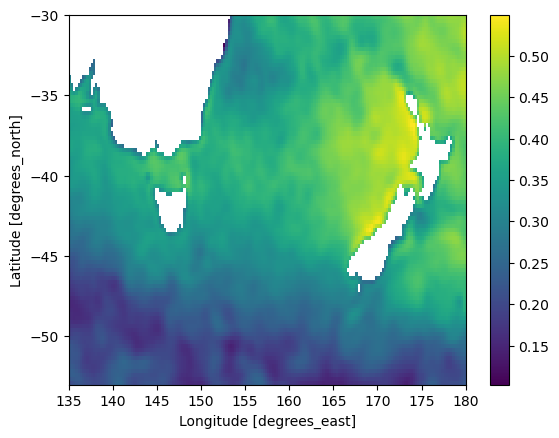

In [25]:
sata_ssta_corr.plot()

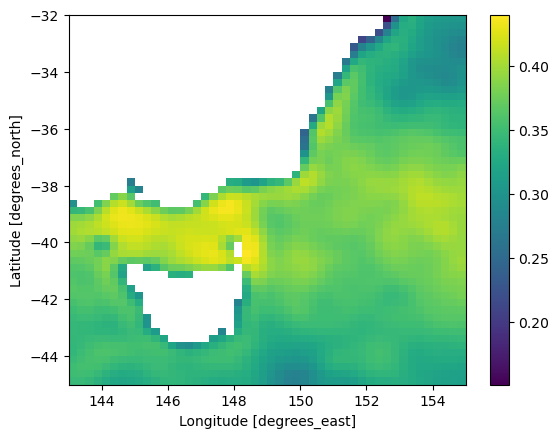

In [26]:
sata_ssta_corr.sel(lat=slice(-45, -32), lon=slice(143, 155)).plot()

In [28]:
import numpy as np

/jobfs/89249030.gadi-pbs/ipykernel_885866/3346443571.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_885866/3346443571.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return fun

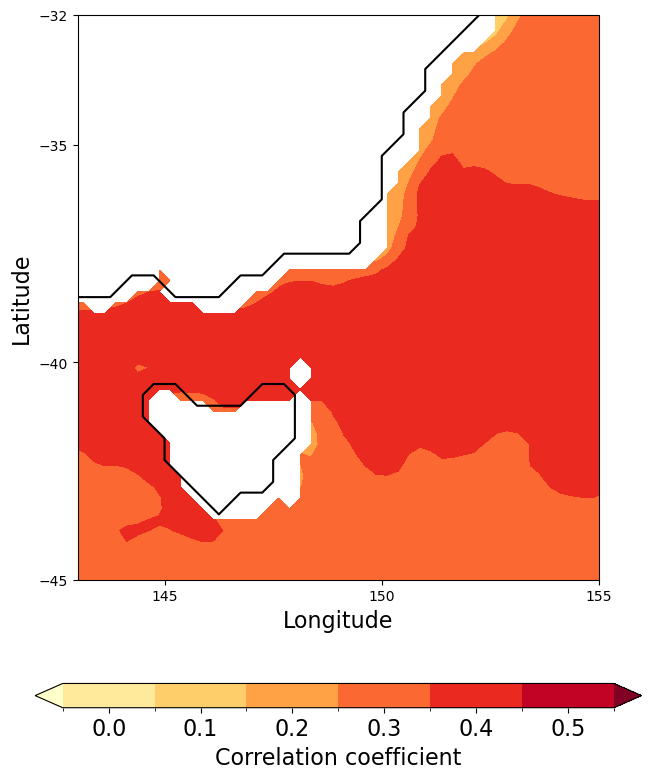

In [63]:
## Correlation between SATa and SSTa for AUS (1982-2018)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = sata_shifted_ssta_corr.plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-0.05, 0.6, 0.1),
    cmap=plt.cm.get_cmap('YlOrRd'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(0,0.6,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Correlation coefficient', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

#plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/correlation_sata_ssta_shifted_aus.png')
plt.show()

/jobfs/89249030.gadi-pbs/ipykernel_885866/185137224.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_885866/185137224.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(

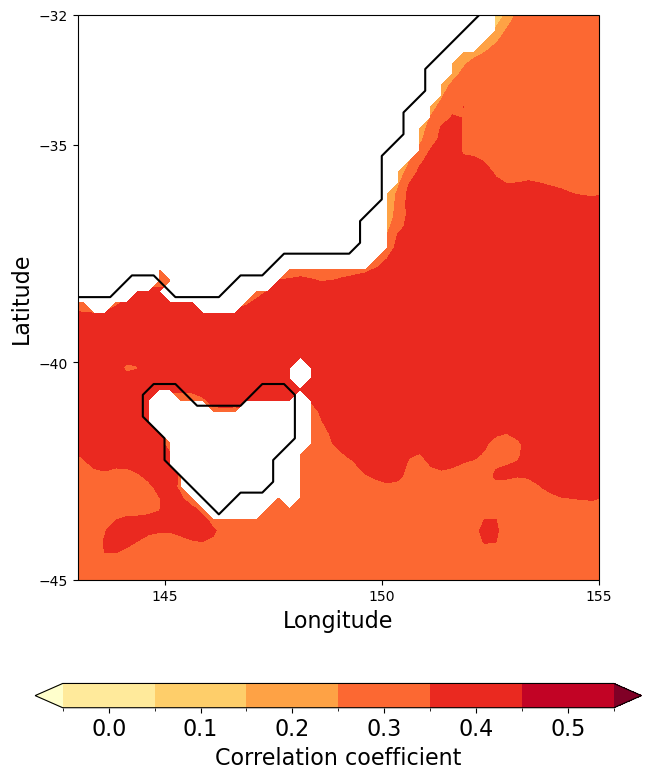

In [42]:
## Correlation between SATa and SSTa for AUS (1982-2018)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([143, 155, -45, -32], crs=ccrs.PlateCarree())       
ax.set_xticks((145, 150, 155), crs=ccrs.PlateCarree())
ax.set_yticks((-45, -40, -35, -32), crs=ccrs.PlateCarree())

contour = sata_shifted_ssta_corr.plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-0.05, 0.6, 0.1),
    cmap=plt.cm.get_cmap('YlOrRd'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(0,0.6,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Correlation coefficient', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/correlation_sata_shifted_ssta_aus.png')

/jobfs/89249030.gadi-pbs/ipykernel_885866/3506943880.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
/jobfs/89249030.gadi-pbs/ipykernel_885866/3506943880.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/array/numpy_compat.py:43: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return fun

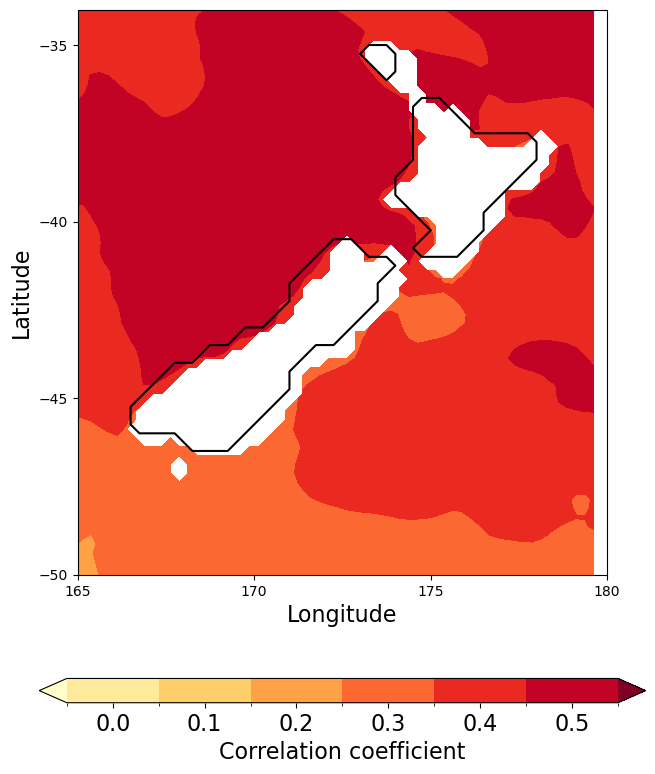

In [45]:
## Correlation between SATa and SSTa for NZ (1982-2018)
    
fig, ax = plt.subplots(111, figsize=(16,9))
ax = plt.subplot(111, projection=ccrs.PlateCarree()) # Specifies the projection for the plots
                       
ax.set_extent([165, 180, -50, -34], crs=ccrs.PlateCarree())      
ax.set_xticks((165, 170, 175, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -45, -40, -35), crs=ccrs.PlateCarree())

contour = sata_shifted_nz_ssta_corr.plot.contourf( ## 60x60x24 to calculate heat adv for a day
    levels = np.arange(-0.05, 0.6, 0.1),
    cmap=plt.cm.get_cmap('YlOrRd'),
    extend='both',
    add_colorbar=False
)
        
mask_mean = mask.mean(dim='time')

ax.contour(
    mask_mean.longitude, 
    mask_mean.latitude,
    mask_mean.values,
    levels=[0.5], 
    cmap='gray')
        
cbar = plt.colorbar(contour, orientation="horizontal",ticks=np.arange(0,0.6,0.1),
                    fraction=0.035,aspect=25, extend='both')
cbar.set_label(label=u'Correlation coefficient', fontsize=16)  
cbar.ax.tick_params(labelsize=16)

plt.xlabel('Longitude',fontsize=16)
plt.ylabel('Latitude', fontsize=16)

plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/correlation_sata_shifted_ssta_nz.png')

## Regression between ocean temperature and land temperature

In [109]:
ds_sst = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NOAA-OISST/oisst_aus_time_*.nc',
                         chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1983', '2012'))
sst = ds_sst.sst.sel(lat=slice(-53, -30), lon=slice(135, 180))

In [110]:
ds_sat = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/era5_dailytmean_*.nc',
                         chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1983', '2012'))
dailytmean = ds_sat.dailytmean.sel(latitude=slice(-30, -53), longitude=slice(135, 180))
sat = dailytmean - 273.15

In [111]:
sat

<xarray.DataArray 'dailytmean' (time: 10958, latitude: 93, longitude: 180)>
dask.array<sub, shape=(10958, 93, 180), dtype=float32, chunksize=(90, 80, 120), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1983-01-01 1983-01-02 ... 2012-12-31
  * longitude  (longitude) float32 135.0 135.2 135.5 135.8 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 -30.0 -30.25 -30.5 ... -52.5 -52.75 -53.0

In [112]:
sst

<xarray.DataArray 'sst' (time: 10958, lat: 92, lon: 180)>
dask.array<getitem, shape=(10958, 92, 180), dtype=float32, chunksize=(90, 92, 180), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1983-01-01T12:00:00 ... 2012-12-31T12:00:00
  * lon      (lon) float32 135.1 135.4 135.6 135.9 ... 179.1 179.4 179.6 179.9
  * lat      (lat) float32 -52.88 -52.62 -52.38 -52.12 ... -30.62 -30.38 -30.12
Attributes:
    long_name:     Daily sea surface temperature
    units:         Celsius
    cell_methods:  zlev: mean

In [125]:
ocean_temperature = sst.sel(lat=slice(-50, -30), lon=slice(140, 180)).mean(dim=('lat', 'lon'))
land_temperature = sat.sel(latitude=slice(-30, -50), longitude=slice(140, 180)).mean(dim=('latitude', 'longitude'))

In [126]:
data1= ocean_temperature.dropna(dim='time', how='any')
data2= land_temperature.dropna(dim='time', how='any')

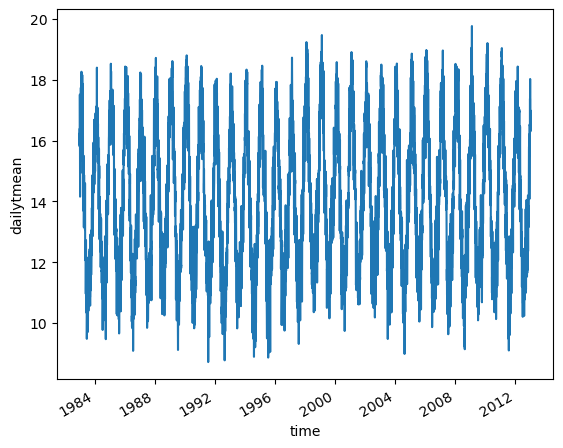

In [127]:
land_temperature.plot()

In [122]:
data2

<xarray.DataArray 'dailytmean' (time: 0)>
dask.array<getitem, shape=(0,), dtype=float32, chunksize=(0,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns]

In [128]:
mask = ~np.isnan(ocean_temperature) & ~np.isnan(land_temperature)

In [129]:
mask

<xarray.DataArray (time: 0)>
dask.array<and_, shape=(0,), dtype=bool, chunksize=(0,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns]

In [130]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data1, data2)

In [131]:
slope

1.259961782755411

In [133]:
line = slope*data1+intercept

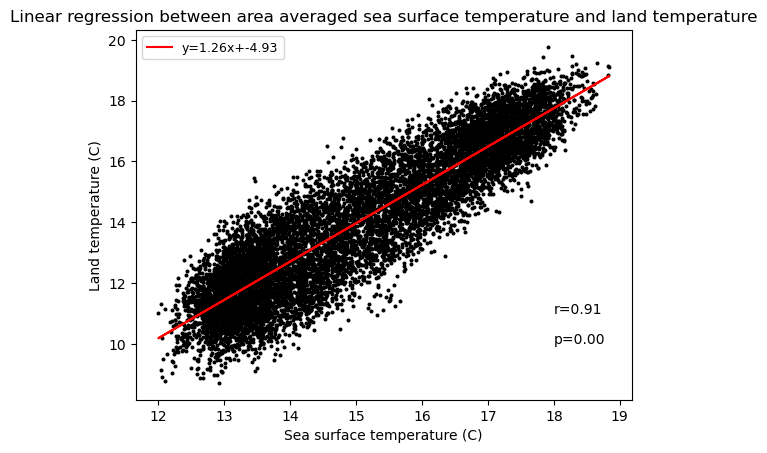

In [138]:
plt.plot(data1, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.text(18, 11, 'r={:.2f}'.format(r_value))
plt.text(18, 10, 'p={:.2f}'.format(p_value))

#end

plt.scatter(data1,data2, color="k", s=3.5)
plt.legend(fontsize=9)
plt.xlabel('Sea surface temperature (C)')
plt.ylabel('Land temperature (C)')
plt.title('Linear regression between area averaged sea surface temperature and land temperature')

plt.show()

## Regression of spatial SATa and area averaged SSTa

In [2]:
ds_era5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/t2m_anom_noaa_remap.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
sata = ds_era5.t2m_anomaly.sel(lat=slice(-53, -30), lon=slice(135, 180))

In [3]:
ds_gm = xr.open_mfdataset(['/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-70to-50.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-70to-50.1981.2022.nc'],
                         chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
ds_gm

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 01-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:        (time: 13514, lat: 160, lon: 240, time366: 366)
Coordinates:
  * lat            (lat) float32 -69.88 -69.62 -69.38 ... -30.62 -30.38 -30.12
  * lon            (lon) float32 120.1 120.4 120.6 120.9 ... 179.4 179.6 179.9
  * time           (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
  * time366        (time366) datetime64[ns] 1983-12-30 1983-12-31 ... 1984-12-29
Data variables:
    severity       (time, lat, lon) float32 dask.array<chunksize=(56, 80, 120), meta=np.ndarray>
    ssta           (time, lat, lon) float32 dask.array<chunksize=(56, 80, 120), meta=np.ndarray>
    climatology90  (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
    climatology    (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
Attributes:
    history:  Created in regional_MHW_hdd4_anomaly.py pctile=902022-10-10 15:...

In [4]:
ssta = ds_gm.ssta.sel(lat=slice(-50, -30), lon=slice(140, 180)).mean(dim=('lat', 'lon'))
ssta

<xarray.DataArray 'ssta' (time: 13514)>
dask.array<mean_agg-aggregate, shape=(13514,), dtype=float32, chunksize=(90,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31

In [43]:
sata_seas = sata.sel(time=sata.time.dt.month.isin([9, 10, 11, 12, 1, 2]))
ssta_seas = ssta.sel(time=ssta.time.dt.month.isin([9, 10, 11, 12, 1, 2]))

In [47]:
sata_mon = sata_seas.resample(time='1M').mean(dim='time')
ssta_mon = ssta_seas.resample(time='1M').mean(dim='time')

In [20]:
from  scipy import stats, signal

ValueError: array must not contain infs or NaNs

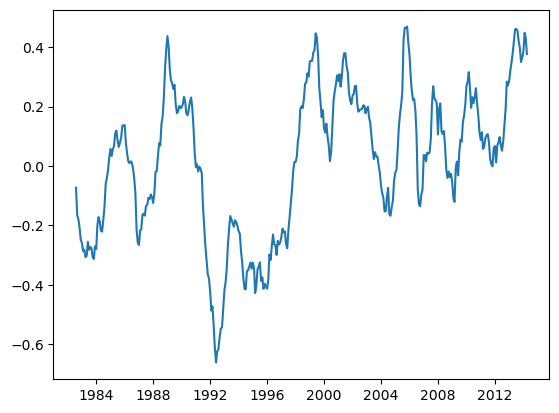

In [29]:
"""Remove seasonality as it would influence the correlation:
Take a 12-month moving average; 
The average will affect all values in the first and last 6 months, so remove them.
"""
sata_mon = sata_mon.rolling(time= 12, center=True).mean()[6:-6,...] 

plt.plot(sata_mon.time, sata_mon.mean(axis=(1,2)), label = '12-mo ma')
sata_mean = sata_mon.mean(axis=0)

"""Detrend data as it would influence the correlation"""
sata_mon = xr.DataArray(signal.detrend(sata_mon, axis=0), dims=sata_mon.dims, coords=sata_mon.coords) + sata_mean
plt.plot(sata_mon.time, sata_mon.mean(axis=(1,2)), label = '12-mo ma & detrended')
plt.legend(loc = 'upper left', ncol = 3).draw_frame(False)
#plt.title('Mean Global Precipitation')

ValueError: x and y must have same first dimension, but have shapes (408,) and (1,)

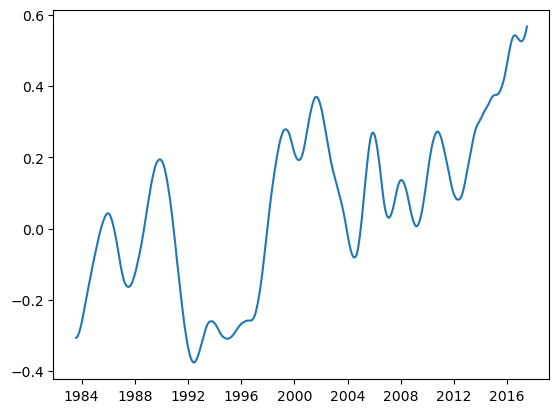

In [33]:
"""Remove seasonality as it would influence the correlation:
Take a 12-month moving average; 
The average will affect all values in the first and last 6 months, so remove them.
"""
ssta_mon = ssta_mon.rolling(time= 12, center=True).mean()[6:-6,...] 

plt.plot(ssta_mon.time, ssta_mon, label = '12-mo ma')
ssta_mean = ssta_mon.mean(axis=0)

"""Detrend data as it would influence the correlation"""
ssta_mon = xr.DataArray(signal.detrend(ssta_mon, axis=0), dims=ssta_mon.dims, coords=ssta_mon.coords) + ssta_mean
plt.plot(ssta_mon.time, ssta_mon.mean(axis=(0)), label = '12-mo ma & detrended')
plt.legend(loc = 'upper left', ncol = 3).draw_frame(False)
#plt.title('Mean Global Precipitation')

In [21]:
def lag_linregress_3D(x, y, lagx=0, lagy=0):
    """
    Input: Two xr.Datarrays of any dimensions with the first dim being time. 
    Thus the input data could be a 1D time series, or for example, have three dimensions (time,lat,lon). 
    Datasets can be provied in any order, but note that the regression slope and intercept will be calculated
    for y with respect to x.
    Output: Covariance, correlation, regression slope and intercept, p-value, and standard error on regression
    between the two datasets along their aligned time dimension.  
    Lag values can be assigned to either of the data, with lagx shifting x, and lagy shifting y, with the specified lag amount. 
    """ 
    #1. Ensure that the data are properly alinged to each other. 
    x,y = xr.align(x,y)
    
    #2. Add lag information if any, and shift the data accordingly
    if lagx!=0:
        #If x lags y by 1, x must be shifted 1 step backwards. 
        #But as the 'zero-th' value is nonexistant, xr assigns it as invalid (nan). Hence it needs to be dropped
        x   = x.shift(time = -lagx).dropna(dim='time')
        #Next important step is to re-align the two datasets so that y adjusts to the changed coordinates of x
        x,y = xr.align(x,y)

    if lagy!=0:
        y   = y.shift(time = -lagy).dropna(dim='time')
        x,y = xr.align(x,y)
 
    #3. Compute data length, mean and standard deviation along time axis for further use: 
    n     = x.shape[0]
    xmean = x.mean(axis=0)
    ymean = y.mean(axis=0)
    xstd  = x.std(axis=0)
    ystd  = y.std(axis=0)
    
    #4. Compute covariance along time axis
    cov   =  np.sum((x - xmean)*(y - ymean), axis=0)/(n)
    
    #5. Compute correlation along time axis
    cor   = cov/(xstd*ystd)
    
    #6. Compute regression slope and intercept:
    slope     = cov/(xstd**2)
    intercept = ymean - xmean*slope  
    
    #7. Compute P-value and standard error
    #Compute t-statistics
    tstats = cor*np.sqrt(n-2)/np.sqrt(1-cor**2)
    stderr = slope/tstats
    
    from scipy.stats import t
    pval   = t.sf(tstats, n-2)*2
    pval   = xr.DataArray(pval, dims=cor.dims, coords=cor.coords)

    return cov,cor,slope,intercept,pval,stderr

In [49]:
cov,cor,slope,intercept,pval,stderr = lag_linregress_3D(x=ssta_mon,y=sata_mon)

#print 'x = 1-dim, y = 3-dim:\n', cor[39,52].data, pval[39,52].data, slope[39,52].data, intercept[39,52].data, stderr[39,52].data

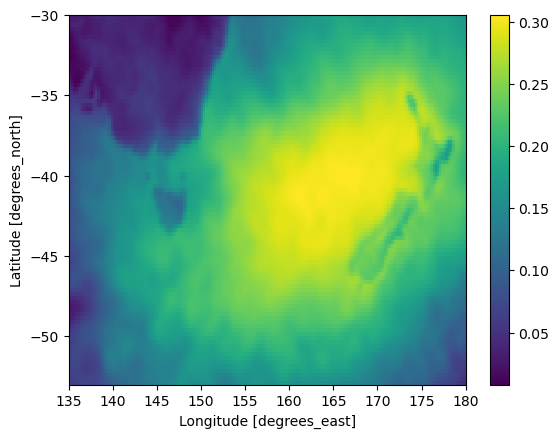

In [50]:
cor.plot()

/jobfs/91616221.gadi-pbs/ipykernel_15604/156763552.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree())
/jobfs/91616221.gadi-pbs/ipykernel_15604/156763552.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),


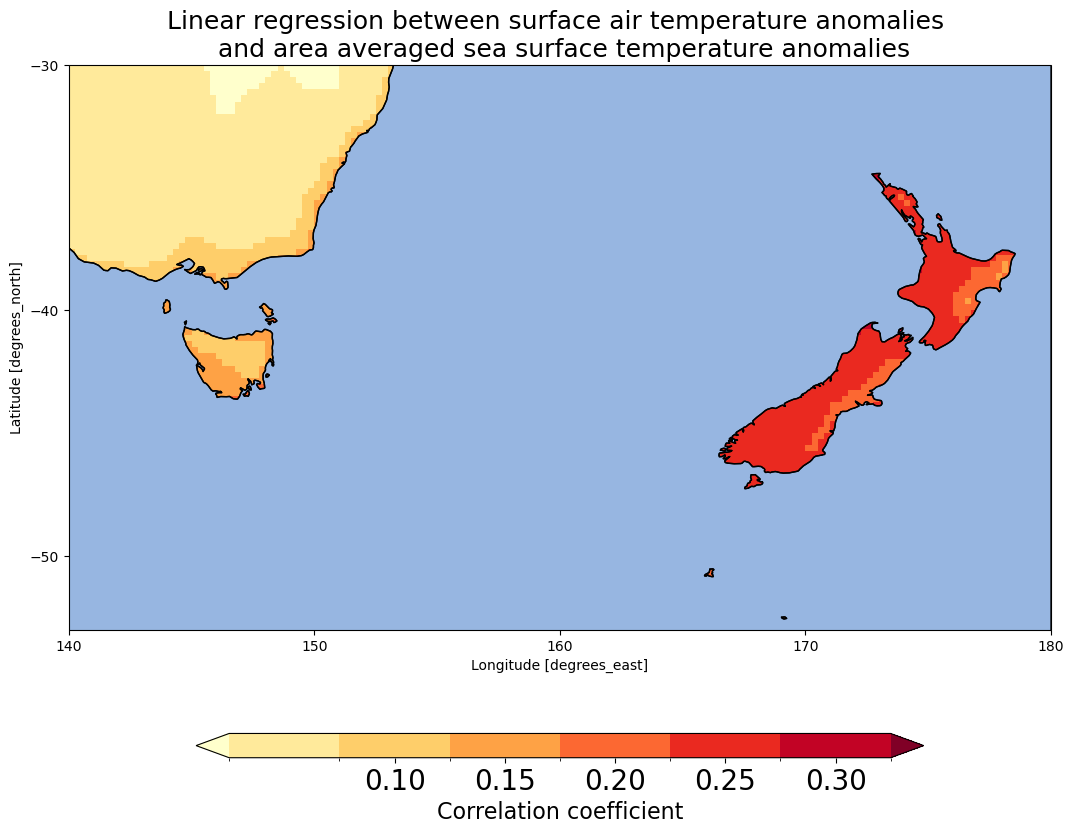

In [53]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -53, -30],crs=ccrs.PlateCarree())  
ax.set_xticks((140, 150, 160, 170, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -40, -30), crs=ccrs.PlateCarree())

im=cor.plot(
        cmap=plt.cm.get_cmap('YlOrRd'), 
        extend='both',
        levels=np.arange(0.025, 0.35, 0.05),
        add_colorbar=False, 
)

cb = fig.colorbar(im, orientation="horizontal",ticks=np.arange(0.1,0.35,0.05),
                    fraction=0.035,aspect=30)
cb.set_label(label='Correlation coefficient', fontsize=16, weight='normal')
cb.ax.tick_params(labelsize=20)

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=1, edgecolor='black', facecolor=cfeature.COLORS['water'])

plt.title('Linear regression between surface air temperature anomalies \n and area averaged sea surface temperature anomalies', fontsize=18)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/lingress-mon.png')

/jobfs/91616221.gadi-pbs/ipykernel_15604/681263635.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree())
/jobfs/91616221.gadi-pbs/ipykernel_15604/681263635.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),


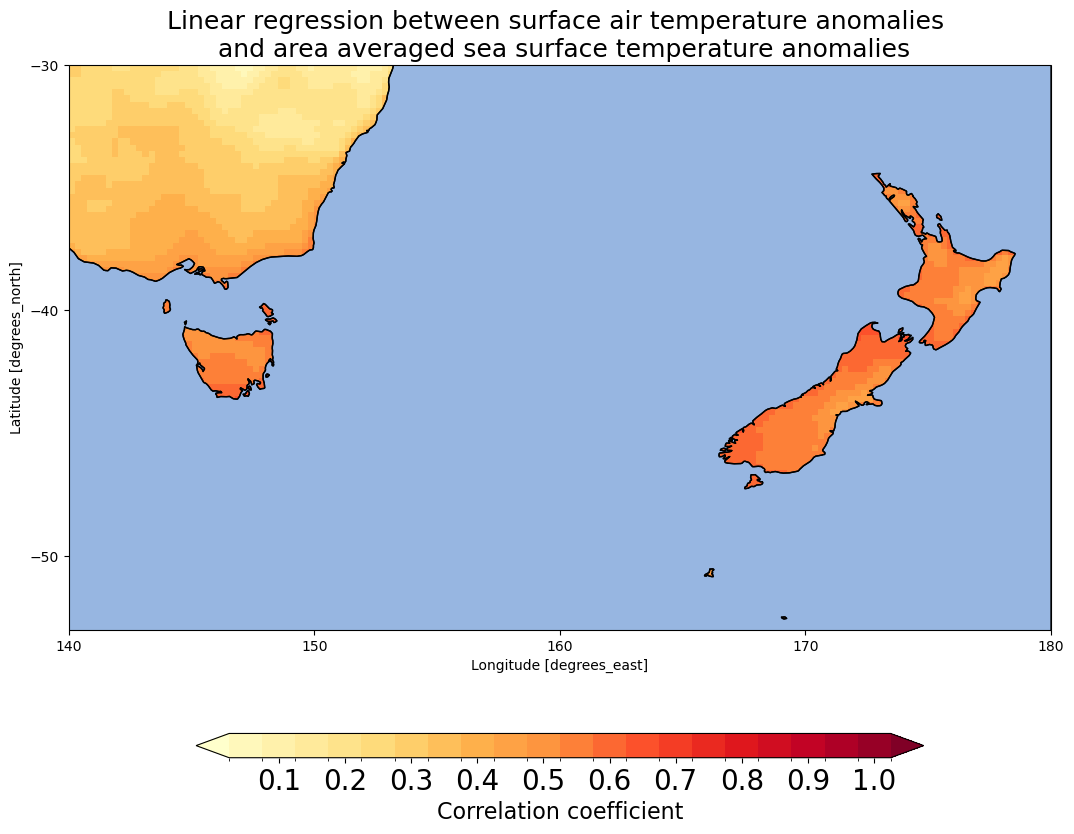

In [41]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -53, -30],crs=ccrs.PlateCarree())  
ax.set_xticks((140, 150, 160, 170, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -40, -30), crs=ccrs.PlateCarree())

im=cor.plot(
        cmap=plt.cm.get_cmap('YlOrRd'), 
        extend='both',
        levels=np.arange(0.025, 1.05, 0.05),
        add_colorbar=False, 
)

cb = fig.colorbar(im, orientation="horizontal",ticks=np.arange(0.1,1.1,0.1),
                    fraction=0.035,aspect=30)
cb.set_label(label='Correlation coefficient', fontsize=16, weight='normal')
cb.ax.tick_params(labelsize=20)

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=1, edgecolor='black', facecolor=cfeature.COLORS['water'])

plt.title('Linear regression between surface air temperature anomalies \n and area averaged sea surface temperature anomalies', fontsize=18)

#plt.show()
plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/lingress.png')

/jobfs/91616221.gadi-pbs/ipykernel_15604/633771598.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(111, projection=ccrs.PlateCarree())
/jobfs/91616221.gadi-pbs/ipykernel_15604/633771598.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd'),


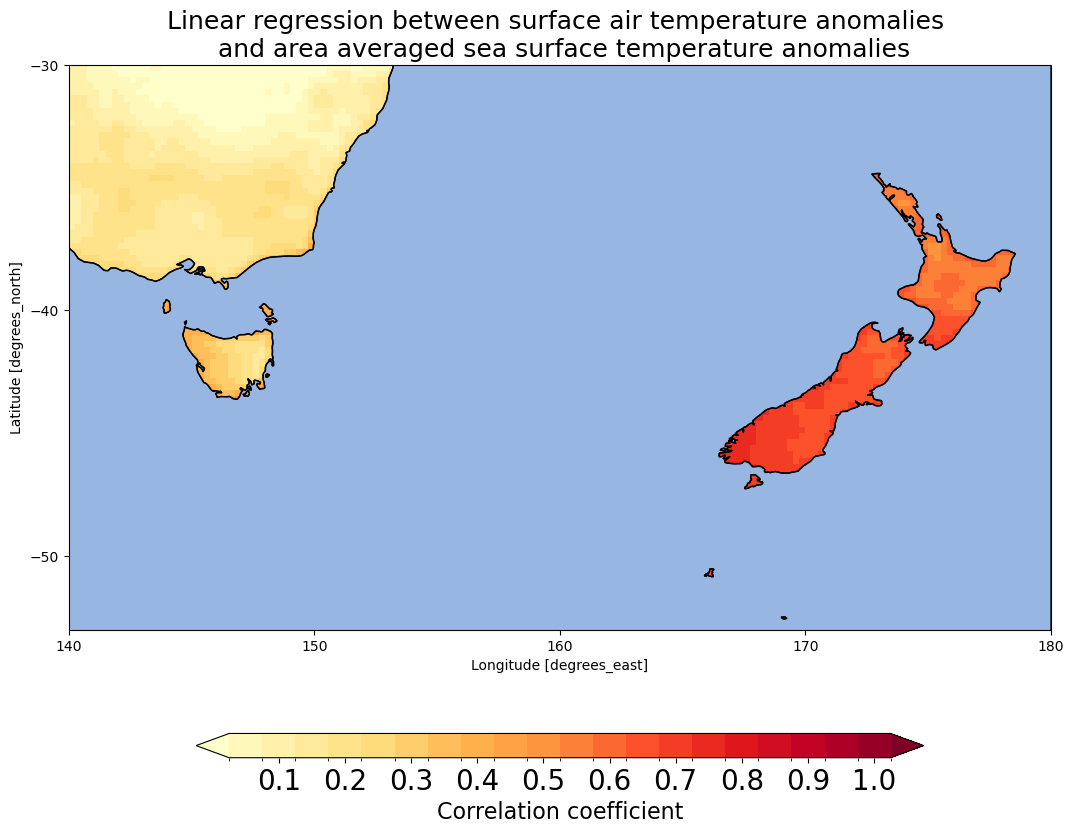

In [36]:
fig, ax = plt.subplots(111, figsize=(16,9))    
ax = plt.subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([140, 180, -53, -30],crs=ccrs.PlateCarree())  
ax.set_xticks((140, 150, 160, 170, 180), crs=ccrs.PlateCarree())
ax.set_yticks((-50, -40, -30), crs=ccrs.PlateCarree())

im=cor.plot(
        cmap=plt.cm.get_cmap('YlOrRd'), 
        extend='both',
        levels=np.arange(0.025, 1.05, 0.05),
        add_colorbar=False, 
)

cb = fig.colorbar(im, orientation="horizontal",ticks=np.arange(0.1,1.1,0.1),
                    fraction=0.035,aspect=30)
cb.set_label(label='Correlation coefficient', fontsize=16, weight='normal')
cb.ax.tick_params(labelsize=20)

ax.coastlines()
ax.add_feature(cartopy.feature.OCEAN, zorder=1, edgecolor='black', facecolor=cfeature.COLORS['water'])

plt.title('Linear regression between surface air temperature anomalies \n and area averaged sea surface temperature anomalies', fontsize=18)

plt.show()
#plt.savefig('/g/data/e14/cp3790/Charuni/CORDEX/PLOTS/bn-access-humidity.png', dpi=600)

In [ ]:

            
            # Create a Rectangle patch
            rect = patches.Rectangle((147, -46), 8, 8, linewidth=2, edgecolor='b', facecolor='none')
            ax[row, col].add_patch(rect)
            
            #ax[row, col].axis([0, 10, 0, 10])
            ax[row, col].text(147, -49, 'r=%s'%str(corr_test_box_round[data_idx])) 
            #plt.title('time=%s'%str(d_terr.time[n])[36:46], fontsize=24)
            month_num_idx += 1

            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0.1,1.1,0.1),
                        fraction=0.035,aspect=25)
    cbar.set_label(label='Correlation coefficient', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
     
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Fig3.13.png')
    

multiple_plots()

## Correlation between SAT and SST anomalies

In [9]:
ds_era5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/t2m_anom_noaa_remap.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
sata = ds_era5.t2m_anomaly.sel(lat=slice(-53, -30), lon=slice(135, 180))

In [10]:
sata_mon = sata.resample(time='1M').mean(dim='time')

In [11]:
ds_gm = xr.open_mfdataset(['/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.120to150.-70to-50.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-50to-30.1981.2022.nc',
                           '/g/data/e14/asg561/MHW_NOAAupdated/mhw_data_90pc/mhw_severity.pc90.150to180.-70to-50.1981.2022.nc'],
                         chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
ds_gm

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/xarray/coding/times.py:154: SerializationWarning: Ambiguous reference date string: 01-01-01 00:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 00:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:        (time: 13514, lat: 160, lon: 240, time366: 366)
Coordinates:
  * lat            (lat) float32 -69.88 -69.62 -69.38 ... -30.62 -30.38 -30.12
  * lon            (lon) float32 120.1 120.4 120.6 120.9 ... 179.4 179.6 179.9
  * time           (time) datetime64[ns] 1982-01-01 1982-01-02 ... 2018-12-31
  * time366        (time366) datetime64[ns] 1983-12-30 1983-12-31 ... 1984-12-29
Data variables:
    severity       (time, lat, lon) float32 dask.array<chunksize=(56, 80, 120), meta=np.ndarray>
    ssta           (time, lat, lon) float32 dask.array<chunksize=(56, 80, 120), meta=np.ndarray>
    climatology90  (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
    climatology    (time366, lat, lon) float32 dask.array<chunksize=(366, 80, 120), meta=np.ndarray>
Attributes:
    history:  Created in regional_MHW_hdd4_anomaly.py pctile=902022-10-10 15:...

In [12]:
ssta = ds_gm.ssta.sel(lat=slice(-53, -30), lon=slice(135, 180))
ssta_mon = ssta.resample(time='1M').mean(dim='time')

In [13]:
sata_mon_box = sata_mon.sel(lat=slice(-45, -37), lon=slice(147, 155)).mean(dim=('lat', 'lon'))
ssta_mon_box = ssta_mon.sel(lat=slice(-45, -37), lon=slice(147, 155)).mean(dim=('lat', 'lon'))

In [14]:
ssta_month_idxs = ssta_mon.groupby('time.month').groups
ssta_monthly = []
for num in range (1, 13):
    ssta_xr = ssta_mon.isel(time=ssta_month_idxs[num])
    ssta_monthly.append(ssta_xr)
#ssta_mon_xr = xr.concat(ssta, dim='months')

In [15]:
sata_month_idxs = sata_mon.groupby('time.month').groups
sata_monthly = []
for num in range (1, 13):
    sata_xr = sata_mon.isel(time=sata_month_idxs[num])
    sata_monthly.append(sata_xr)
#ssta_mon_xr = xr.concat(ssta, dim='months')

In [16]:
sata_month_idxs = sata_mon_box.groupby('time.month').groups
sata_monthly_box = []
for num in range (1, 13):
    sata_xr = sata_mon_box.isel(time=sata_month_idxs[num])
    sata_monthly_box.append(sata_xr)

In [17]:
ssta_month_idxs = ssta_mon_box.groupby('time.month').groups
ssta_monthly_box = []
for num in range (1, 13):
    ssta_xr = ssta_mon_box.isel(time=ssta_month_idxs[num])
    ssta_monthly_box.append(ssta_xr)

In [18]:
corr_test = []
for n in range (12):
    corr_xr = xr.corr(ssta_monthly[n], sata_monthly[n], dim='time')
    corr_test.append(corr_xr)

In [19]:
corr_test_box = []
for n in range (12):
    corr_xr = xr.corr(ssta_monthly_box[n], sata_monthly_box[n], dim='time')
    corr_test_box.append(corr_xr)

In [20]:
float(corr_test_box[0].values)

0.9035582736446001

In [21]:
corr_test_box_round = []
for n in range(12):
    corr_test_box_round_xr = round(float(corr_test_box[n].values),2)
    corr_test_box_round.append(corr_test_box_round_xr)

In [22]:
corr_test_box_round[4]

0.61

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


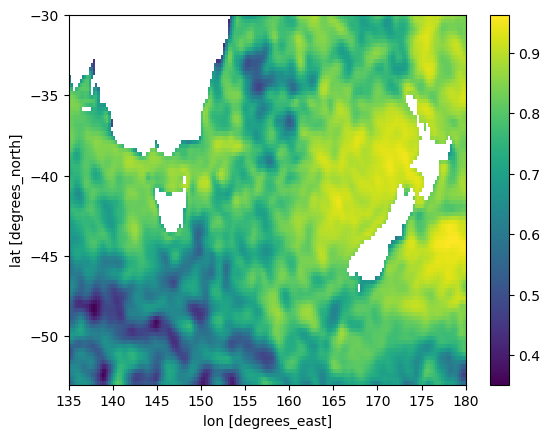

In [23]:
corr_test[11].plot()

In [24]:
corr_dec = xr.corr(ssta_monthly[11], sata_monthly[11], dim='time')

In [26]:
import numpy as np

/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/jobfs/90503830.gadi-pbs/ipykernel_1900178/645785097.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('YlOrRd', 21)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-23.04/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1662: UserWarning: The following kwargs were not used by contour: 'add_colorbar'
  result = super().contourf(*args, **kwargs)
/g/data/hh5/public/apps/miniconda

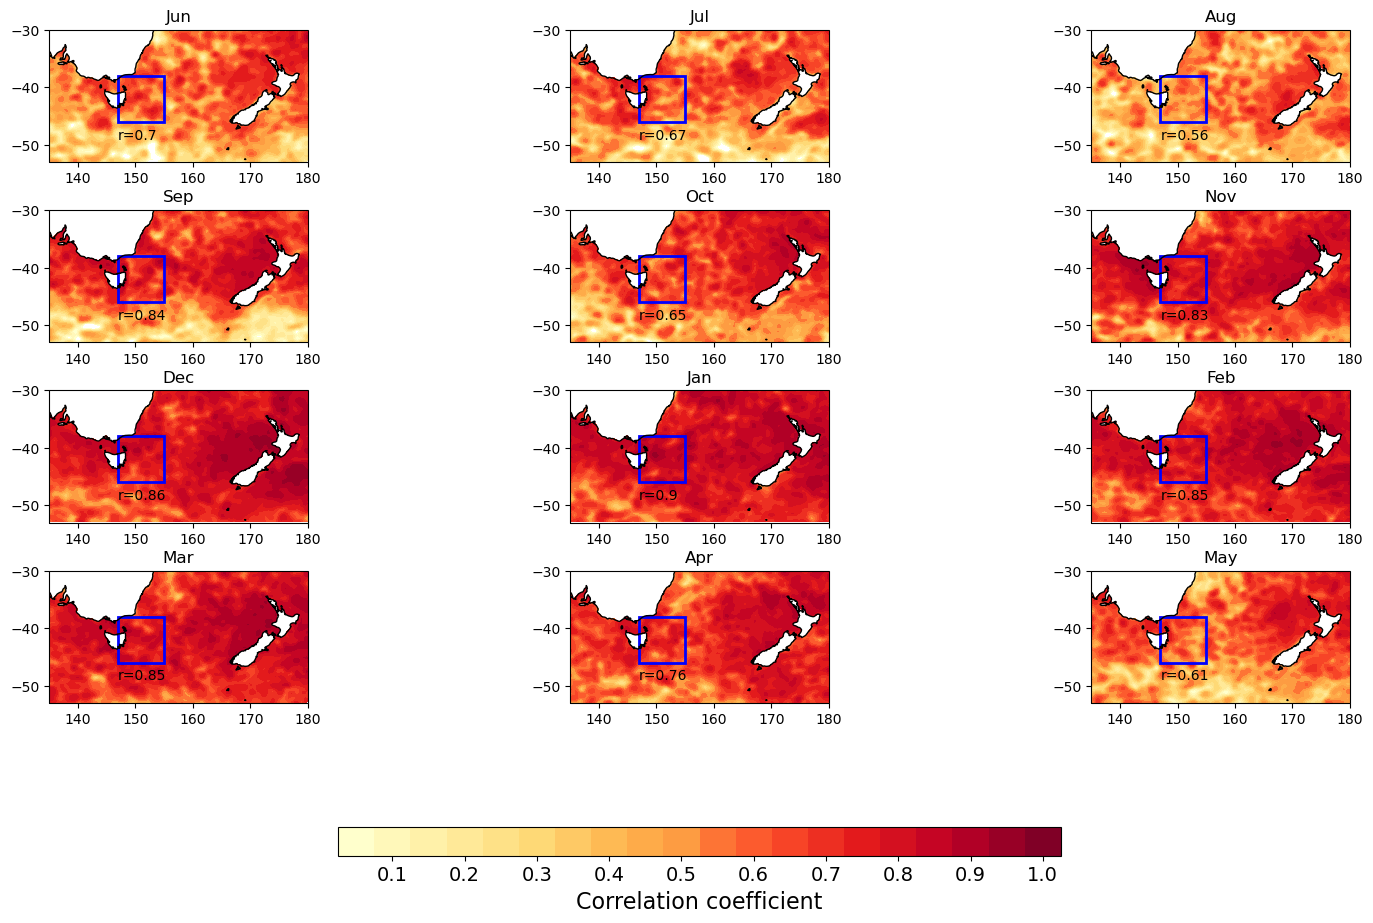

In [30]:
## Correlation plots for each month (between SAT and SST anomalies, detrended)

def multiple_plots():
    nrow = 4
    ncol = 3
    
    fig, ax = plt.subplots(nrows=nrow,ncols=ncol, figsize=(16,9), 
            subplot_kw={'projection': ccrs.PlateCarree()}) # Specifies the projection for the plots    
    
    data = corr_test
    
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    month_nums = [5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4]
    
    month_num_idx = 0
    for row in range(nrow):
        for col in range(ncol):
            data_idx = month_nums[month_num_idx]
            cur_data = data[data_idx]
            contour = ax[row, col].contourf(
                cur_data.lon,
                cur_data.lat,
                cur_data.values,
                levels=np.arange(0.025, 1.05, 0.05),
                add_colorbar=False,
                cmap=plt.cm.get_cmap('YlOrRd', 21)
            )
            
            ax[row, col].coastlines()
            ax[row, col].set_extent([135, 180, -53, -30],crs=ccrs.PlateCarree()) 
            ax[row, col].set_xticks((140, 150, 160, 170, 180), crs=ccrs.PlateCarree())
            ax[row, col].set_yticks((-50, -40, -30), crs=ccrs.PlateCarree())
            ax[row, col].set_title(month_labels[data_idx])
            
            # Create a Rectangle patch
            rect = patches.Rectangle((147, -46), 8, 8, linewidth=2, edgecolor='b', facecolor='none')
            ax[row, col].add_patch(rect)
            
            #ax[row, col].axis([0, 10, 0, 10])
            ax[row, col].text(147, -49, 'r=%s'%str(corr_test_box_round[data_idx])) 
            #plt.title('time=%s'%str(d_terr.time[n])[36:46], fontsize=24)
            month_num_idx += 1

            
    # Choose the traversal you'd like: 'F' is col-wise, 'C' is row-wise           
    ax_flat = ax.flatten(order='C')
    
                
    # Delete any unused axes from the figure, so that they don't show
    # blank x- and y-axis lines
    for _, axis in enumerate(ax_flat[12:]):
        fig.delaxes(axis) 
        
    fig.tight_layout()        
    cbar = fig.colorbar(contour, ax=ax.ravel().tolist(), orientation="horizontal",ticks=np.arange(0.1,1.1,0.1),
                        fraction=0.035,aspect=25)
    cbar.set_label(label='Correlation coefficient', fontsize=16)  
    cbar.ax.tick_params(labelsize=14)
     
    
    plt.savefig('/g/data/e14/cp3790/Charuni/ModelExperiment/Revisions/Fig3.13.png')
    

multiple_plots()

## Correlation between SAT and vertical velocity anomalies

In [37]:
#ds_w = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-W/w500_anom.nc',
#                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
ds_w = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-W/w850_anom.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
w_anom = ds_w.w_anomaly.sel(latitude=slice(-30, -53), longitude=slice(135, 180))
w_anom_lat_lon = w_anom.rename(longitude='lon', latitude='lat')

In [38]:
ds_out = xr.Dataset(
    {
        "lat": (["lat"], np.arange(-53.0, -29.75, 0.25)),
        "lon": (["lon"], np.arange(135, 180, 0.25)),
    }
)

In [39]:
ds_era5 = xr.open_mfdataset('/g/data/e14/cp3790/Charuni/NCI/ERA5-T2M-MEAN/t2m_anom_noaa_remap.nc',
                           chunks = {'longitude':120, 'latitude':80, 'time':90}).sel(time=slice('1982', '2018'))
regridder = xe.Regridder(ds_era5, ds_out, "bilinear") # build regridder 
ds_sata = regridder(ds_era5) # apply regridder 
sata = ds_sata.t2m_anomaly

In [40]:
corr_xr = xr.corr(sata, w_anom_lat_lon, dim='time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.04/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


In [41]:
corr_xr

<xarray.DataArray (lat: 93, lon: 180)>
dask.array<truediv, shape=(93, 180), dtype=float64, chunksize=(53, 120), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -53.0 -52.75 -52.5 -52.25 ... -30.5 -30.25 -30.0
  * lon      (lon) float64 135.0 135.2 135.5 135.8 ... 179.0 179.2 179.5 179.8
    level    int32 850

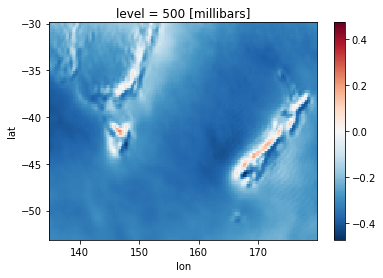

In [36]:
corr_xr.plot()

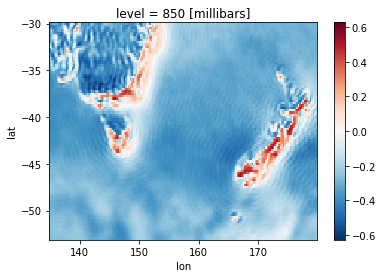

In [42]:
corr_xr.plot()